In [78]:
#packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statistics import mean, median, mode, stdev
from scipy.stats import f_oneway
from scipy.stats import ttest_ind

1. Load the cleaned dataset from the last exercise. If you haven't saved the dataset, rerun the exercise and save the final dataset.

In [88]:
cd = pd.read_csv('cd.csv', index_col = 0)
cd

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
StudentId,,,,,,,,,,,,,,
520645,female,group C,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
303683,female,group C,some college,standard,none,married,sometimes,yes,0.0,walking,10-May,69,90,88
457351,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
812988,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,walking,10-May,45,56,42
594678,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,10-May,76,78,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
611241,female,group D,high school,standard,none,single,sometimes,no,2.0,school_bus,10-May,59,61,65
299810,male,group E,high school,standard,none,single,regularly,no,1.0,private,10-May,58,53,51
941589,female,group C,high school,free/reduced,completed,married,sometimes,no,1.0,private,10-May,61,70,67


2. a) Find the mean, median and average scores in mathematics, reading and writing. <br>
   b) Find the mean, median and average scores for males and females.<br>
   c) What is the coefficient of variation of the scores? <br>

In [89]:
#a)
#average score = mean
cd[["MathScore", "ReadingScore", "WritingScore"]].describe()

,MathScore,ReadingScore,WritingScore
count,29117.000000,29117.000000,29117.000000
mean,66.559948,69.390081,68.429337
std,15.344253,14.760190,15.447817
min,0.000000,10.000000,4.000000
25%,56.000000,59.000000,58.000000
50%,67.000000,70.000000,69.000000
75%,78.000000,80.000000,79.000000
max,100.000000,100.000000,100.000000


In [91]:
#b)
cd[["Gender", "MathScore", "ReadingScore", "WritingScore"]].groupby("Gender").mean()


,MathScore,ReadingScore,WritingScore
Gender,,,
female,64.119419,72.900825,72.899189
male,69.038488,65.824657,63.889866


In [92]:
cd[["Gender", "MathScore", "ReadingScore", "WritingScore"]].groupby("Gender").median()

,MathScore,ReadingScore,WritingScore
Gender,,,
female,64.0,73.0,73.0
male,69.0,66.0,64.0


In [93]:
#c)
selected_variables = ['MathScore', 'ReadingScore', 'WritingScore']

grouped_data = cd.groupby('Gender')[selected_variables]
cv = (grouped_data.std() / grouped_data.mean()) * 100

cv

,MathScore,ReadingScore,WritingScore
Gender,,,
female,23.695357,19.515187,20.058801
male,21.868989,21.928523,23.370662


3. a) Use a statistical test to test the hypothesis:<br>
H0: the mean mathematical scores of females and males are equal.



In [94]:
math_scores_male = cd[cd['Gender'] == 'male']['MathScore']
math_scores_female = cd[cd['Gender'] == 'female']['MathScore']

t_stat, p_value = ttest_ind(math_scores_male, math_scores_female)

print(f"t-statistic: {t_stat}, p-value: {p_value}")

if p_value < 0.05:
    print("The mean mathematical scores of males and females are significantly different.")
else:
    print("There is no significant difference in the mean mathematical scores of males and females.")


t-statistic: 27.70843426303627, p-value: 8.09604172877808e-167
The mean mathematical scores of males and females are significantly different.


4. a) Use a statistical test to test the hypothesis:<br>
   H0 Gender did not affect the writing scores.<br>
   H1 Gender affected the writing score.<br>

In [69]:
writing_scores_male = cd[cd['Gender'] == 'male']['WritingScore']
writing_scores_female = cd[cd['Gender'] == 'female']['WritingScore']

t_stat, p_value = ttest_ind(writing_scores_male, writing_scores_female)

print(f"t-statistic: {t_stat}, p-value: {p_value}")

alpha = 0.05
if p_value < alpha:
    print("There is a significant difference in the writing scores between males and females.")
else:
    print("There is no significant difference in the writing scores between males and females.")

t-statistic: -52.01694529394566, p-value: 0.0
There is a significant difference in the writing scores between males and females.


5. a) Statisticaly test the distribuitions of female and male scores across the three scores columns.<br>
b) Plot the distributions for each of the separate scores in both genders. <br>

In [70]:
#a)
from scipy.stats import kruskal


math_scores_male = cd[cd['Gender'] == 'male']['MathScore']
reading_scores_male = cd[cd['Gender'] == 'male']['ReadingScore']
writing_scores_male = cd[cd['Gender'] == 'male']['WritingScore']

math_scores_female = cd[cd['Gender'] == 'female']['MathScore']
reading_scores_female = cd[cd['Gender'] == 'female']['ReadingScore']
writing_scores_female = cd[cd['Gender'] == 'female']['WritingScore']

#Kruskal-Wallis H test for each subject
kw_math = kruskal(math_scores_male, math_scores_female)
kw_reading = kruskal(reading_scores_male, reading_scores_female)
kw_writing = kruskal(writing_scores_male, writing_scores_female)


print(f"Kruskal-Wallis H test for Math Scores: {kw_math}")
print(f"Kruskal-Wallis H test for Reading Scores: {kw_reading}")
print(f"Kruskal-Wallis H test for Writing Scores: {kw_writing}")

#p-values to determine ss
alpha = 0.05
if kw_math.pvalue < alpha:
    print("There is a significant difference in the distribution of math scores between males and females.")
else:
    print("There is no significant difference in the distribution of math scores between males and females.")

if kw_reading.pvalue < alpha:
    print("There is a significant difference in the distribution of reading scores between males and females.")
else:
    print("There is no significant difference in the distribution of reading scores between males and females.")

if kw_writing.pvalue < alpha:
    print("There is a significant difference in the distribution of writing scores between males and females.")
else:
    print("There is no significant difference in the distribution of writing scores between males and females.")

Kruskal-Wallis H test for Math Scores: KruskalResult(statistic=698.3529179501126, pvalue=6.8214008151316e-154)
Kruskal-Wallis H test for Reading Scores: KruskalResult(statistic=1616.6341717081764, pvalue=0.0)
Kruskal-Wallis H test for Writing Scores: KruskalResult(statistic=2412.8556211169316, pvalue=0.0)
There is a significant difference in the distribution of math scores between males and females.
There is a significant difference in the distribution of reading scores between males and females.
There is a significant difference in the distribution of writing scores between males and females.


Text(0.5, 1.0, 'Boxplot of Writing Scores')

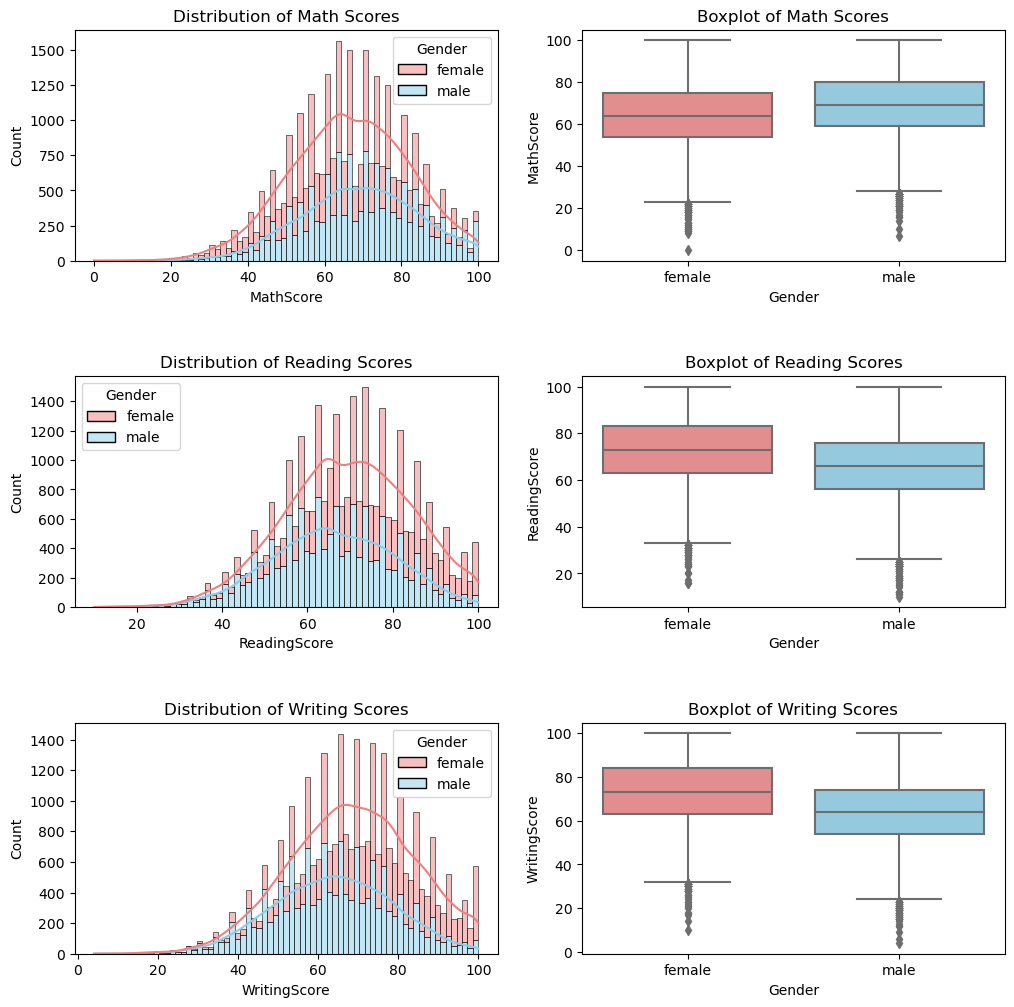

In [77]:
#b)
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 12))
fig.subplots_adjust(hspace=0.5)
colors = {'male': 'skyblue', 'female': 'lightcoral'}

#MSc plot distribution
sns.histplot(cd, x='MathScore', hue='Gender', kde=True, multiple='stack', ax=axes[0, 0], palette=colors)
axes[0, 0].set_title('Distribution of Math Scores')

#RSc plot distribution
sns.histplot(cd, x='ReadingScore', hue='Gender', kde=True, multiple='stack', ax=axes[1, 0],palette=colors)
axes[1, 0].set_title('Distribution of Reading Scores')

#Wsc plot distribution
sns.histplot(cd, x='WritingScore', hue='Gender', kde=True, multiple='stack', ax=axes[2, 0],palette=colors)
axes[2, 0].set_title('Distribution of Writing Scores')

#Box plots for each
sns.boxplot(x='Gender', y='MathScore', data=cd, ax=axes[0, 1],palette=colors)
axes[0, 1].set_title('Boxplot of Math Scores')

sns.boxplot(x='Gender', y='ReadingScore', data=cd, ax=axes[1, 1],palette=colors)
axes[1, 1].set_title('Boxplot of Reading Scores')

sns.boxplot(x='Gender', y='WritingScore', data=cd, ax=axes[2, 1],palette=colors)
axes[2, 1].set_title('Boxplot of Writing Scores')
